# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [7]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014239788055419923 (+/- 0.0005406789567302026)
avg score time: 0.003045463562011719 (+/- 0.0014047846254976782)
avg test score: 0.96 (+/- 0.024944382578492935)


In [6]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018642950057983398 (+/- 0.00142001855445216)
avg score time: 0.007127189636230468 (+/- 0.00013962697432295105)
avg test score: 0.9400000000000001 (+/- 0.044221663871405324)


##### 와인 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [9]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015305042266845702 (+/- 0.0007082889550804424)
avg score time: 0.002868318557739258 (+/- 0.001303860639322858)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [10]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.022155380249023436 (+/- 0.004755119746064326)
avg score time: 0.008499574661254884 (+/- 0.0018459326350310948)
avg test score: 0.9553968253968254 (+/- 0.05146970724043877)


##### 유방암 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [12]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0022877216339111327 (+/- 0.0005080565012658271)
avg score time: 0.007865381240844727 (+/- 0.001210531011766342)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [13]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020790529251098634 (+/- 0.0013498391255193016)
avg score time: 0.015321826934814453 (+/- 0.0003511214172022324)
avg test score: 0.9613414066138798 (+/- 0.008922121107402356)


#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [15]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002018451690673828 (+/- 0.0008556939459589898)
avg score time: 0.0008475780487060547 (+/- 0.0007591194543222069)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [16]:

cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026031684875488282 (+/- 0.0018412382800217961)
avg score time: 0.003220367431640625 (+/- 0.0004863784219494341)
avg test score: 0.9400000000000001 (+/- 0.03265986323710903)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [18]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002000236511230469 (+/- 0.00020978204605638615)
avg score time: 0.0007110595703125 (+/- 0.00033460729241434545)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.028672313690185545 (+/- 0.00321397384561698)
avg score time: 0.004396867752075195 (+/- 0.001876789842226766)
avg test score: 0.9665079365079364 (+/- 0.020746948644437477)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [21]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006790065765380859 (+/- 0.0017662874263253859)
avg score time: 0.0014654636383056641 (+/- 0.00012404729648141934)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [22]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03677372932434082 (+/- 0.0014997951746311064)
avg score time: 0.00693216323852539 (+/- 0.00010407789980285836)
avg test score: 0.9666045645086166 (+/- 0.006582059754774506)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [24]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017728328704833985 (+/- 0.0007855995637736325)
avg score time: 0.0005646705627441406 (+/- 0.00021728060297668942)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


In [25]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026044559478759766 (+/- 0.002928318300398882)
avg score time: 0.0029382228851318358 (+/- 0.0009448759895294915)
avg test score: 0.9466666666666667 (+/- 0.039999999999999994)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [27]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0021524429321289062 (+/- 0.0009827243297279033)
avg score time: 0.0005911350250244141 (+/- 0.0004026049559604898)
avg test score: 0.8709523809523809 (+/- 0.03738625985979144)


In [28]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02477273941040039 (+/- 0.0007840702367106967)
avg score time: 0.002481222152709961 (+/- 0.00012722315634597242)
avg test score: 0.9609523809523809 (+/- 0.028267341226138717)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008086347579956054 (+/- 0.0004589369906264038)
avg score time: 0.00046138763427734376 (+/- 4.420756239320533e-05)
avg test time: 0.9173420276354604 (+/- 0.022887478424340527)


In [30]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03801760673522949 (+/- 0.00271127073257329)
avg score time: 0.0025867462158203126 (+/- 7.486808057808804e-05)
avg test score: 0.9332557056357709 (+/- 0.030125284155110555)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [31]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [32]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [33]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0013584136962890626 (+/- 0.00014355044648578367)
avg score time: 0.0017840862274169922 (+/- 0.0002003210438154645)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017434167861938476 (+/- 0.0009367027949682132)
avg score time: 0.009126806259155273 (+/- 0.00040758699226363794)
avg test time: 0.49531951821780035 (+/- 0.08968617811863551)


##### 당뇨병 데이터

In [34]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [35]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002015209197998047 (+/- 0.0014884188072056396)
avg score time: 0.002115201950073242 (+/- 0.0005360242574958732)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [36]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01777801513671875 (+/- 0.00020134008441168174)
avg score time: 0.009602975845336915 (+/- 0.0008988978596219052)
avg test score: 0.37460690987308276 (+/- 0.0596400792297593)


#### SVR

##### 보스턴 주택 가격 데이터

In [37]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [38]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01643376350402832 (+/- 0.002115106090829655)
avg score time: 0.002689170837402344 (+/- 0.0002662841341782268)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [39]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05308542251586914 (+/- 0.002436231215297524)
avg score time: 0.009032297134399413 (+/- 0.000536356821746433)
avg test score: 0.09717869030858121 (+/- 0.29986290130028104)


##### 당뇨병 데이터

In [41]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [42]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01131582260131836 (+/- 0.001843912027385229)
avg score time: 0.002033901214599609 (+/- 0.00010042958080815081)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [43]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.042378997802734374 (+/- 0.0023167699821834793)
avg score time: 0.007263612747192383 (+/- 0.0003985485124934377)
avg test score: 0.06126106426875429 (+/- 0.028498330498579225)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [44]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [45]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0047872066497802734 (+/- 0.0010807423882619415)
avg score time: 0.0006906986236572266 (+/- 4.100522320269335e-05)
avg test score: 0.28106197340819483 (+/- 0.5692263037259273)


In [46]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03173255920410156 (+/- 0.003872091364020669)
avg score time: 0.0026361942291259766 (+/- 0.00022198206325468956)
avg test score: 0.46517546499906065 (+/- 0.2811158964201889)


##### 당뇨병 데이터

In [47]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [48]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001447439193725586 (+/- 0.00026056753311796125)
avg score time: 0.002562427520751953 (+/- 0.0015204960499688198)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [49]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017966842651367186 (+/- 0.0017773308860859714)
avg score time: 0.008974599838256835 (+/- 0.00026731617825521037)
avg test score: 0.407430853591658 (+/- 0.05403180828573608)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [50]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [51]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [52]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001419210433959961 (+/- 0.00039270719053246015)
avg score time: 0.0023069858551025392 (+/- 0.0009012612253663174)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [53]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.135750150680542 (+/- 0.005071829626502793)
avg score time: 0.00935359001159668 (+/- 0.0014547940461966894)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [54]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001348114013671875 (+/- 0.0006825686429656031)
avg score time: 0.0012497901916503906 (+/- 9.411079271159674e-05)
avg test score: 0.2833079963514746 (+/- 0.3484717614319225)


In [55]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


avg fit time: 0.5620342254638672 (+/- 0.033844611253220226)
avg score time: 0.018606281280517577 (+/- 0.0020392663092816867)
avg test score: 0.011338100102145046 (+/- 0.010164073667903572)


In [56]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


avg fit time: 0.5420263767242431 (+/- 0.006391392204558164)
avg score time: 0.018404483795166016 (+/- 0.0011585194910604152)
avg test score: 0.011312563840653728 (+/- 0.007187266877324731)


In [57]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2056300163269043 (+/- 0.006743657702151921)
avg score time: 0.010370254516601562 (+/- 0.0020432685218867144)
avg test score: 0.9631113181183046 (+/- 0.021749025602840658)


### Random Forests 회귀

In [58]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [59]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.323032283782959 (+/- 0.004613587865015285)
avg score time: 0.008222818374633789 (+/- 0.00025215282382121373)
avg test score: 0.6301453869084405 (+/- 0.2025759427211314)


In [60]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26753716468811034 (+/- 0.008472162090538735)
avg score time: 0.00852952003479004 (+/- 0.0010110588952659605)
avg test score: 0.4176472593380504 (+/- 0.046865496059094784)


### Extremely Randomized Trees 분류

In [61]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [62]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09846353530883789 (+/- 0.0037138046496318572)
avg score time: 0.00828413963317871 (+/- 0.0001730781213419014)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [63]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10509014129638672 (+/- 0.006849017308162238)
avg score time: 0.01007828712463379 (+/- 0.001729218200508812)
avg test score: 0.9833333333333332 (+/- 0.022222222222222233)


In [64]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1175124168395996 (+/- 0.004183160008934293)
avg score time: 0.009692907333374023 (+/- 0.0001305152169491483)
avg test score: 0.9630957925787922 (+/- 0.016072915540411802)


### Extremely Randomized Trees 회귀

In [65]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [66]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1935267448425293 (+/- 0.00726610892590694)
avg score time: 0.008595705032348633 (+/- 0.0003072612627856221)
avg test score: 0.6277298809650065 (+/- 0.2631572960379637)


In [67]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16927165985107423 (+/- 0.006804359339961552)
avg score time: 0.008838748931884766 (+/- 0.00036839256914471486)
avg test score: 0.4441254405182269 (+/- 0.031982461080136866)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [68]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser=.5
RANDOM_SEED = 13

In [ ]:
iris=load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

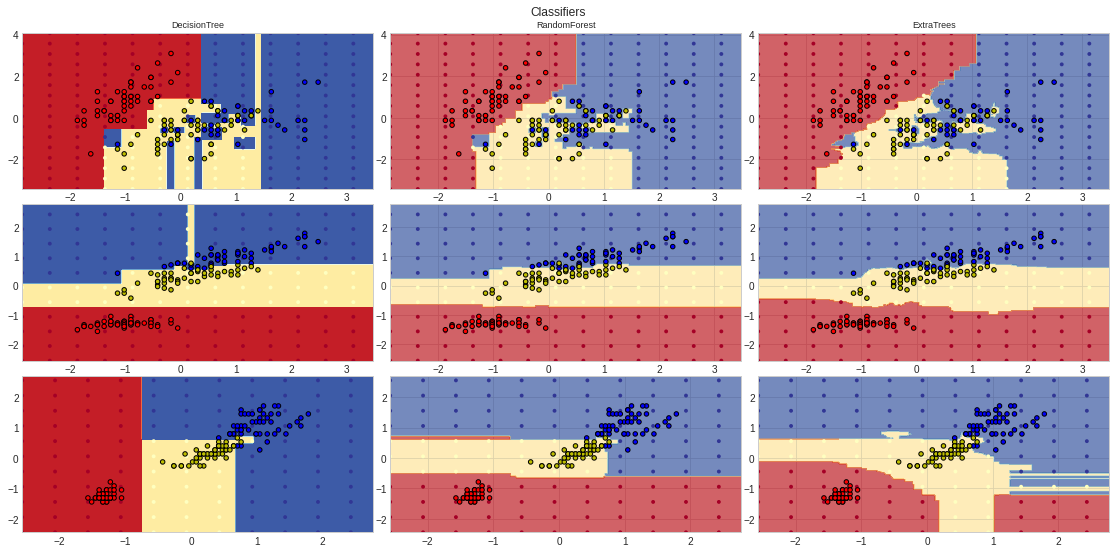

In [ ]:
plt.figure(figsize=(16, 8))

for pair in ([0,1], [0,2], [2,3]):

  for model in models:

    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X, y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)
      
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k', s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

In [ ]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

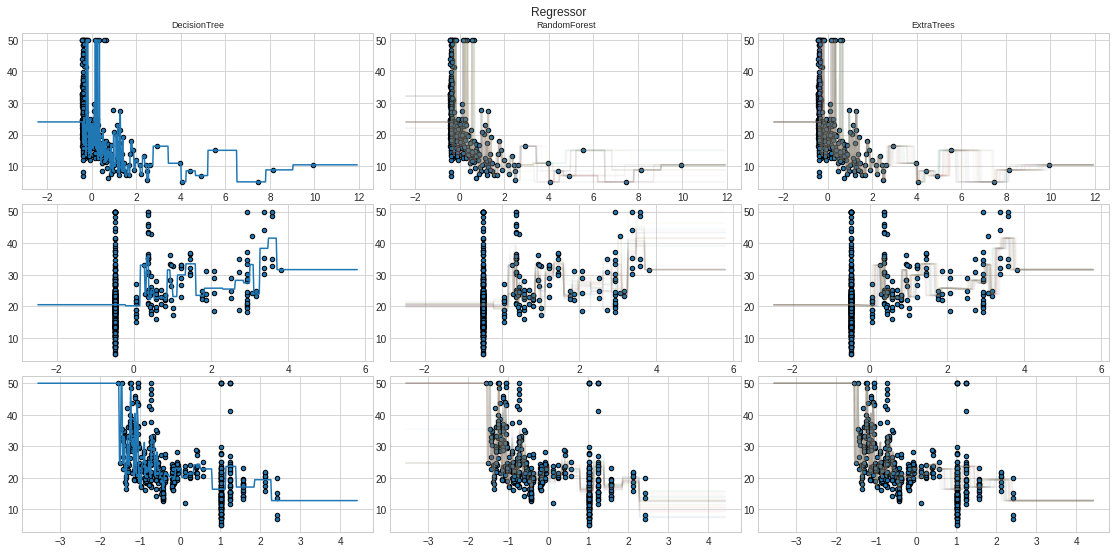

In [ ]:
plt.figure(figsize=(16, 8))

for pair in (0,1,2):

  for model in models:

    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)
      
    x_min, x_max = X.min()-1, X.max() + 1
    y_min, y_max = X.min()-1, X.max() + 1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z, alpha=estimator_alpha)
    
    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [69]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [70]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [71]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07071433067321778 (+/- 0.004892713088918852)
avg score time: 0.008036422729492187 (+/- 0.0025209823504477643)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [72]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07856478691101074 (+/- 0.004484146756247465)
avg score time: 0.007034492492675781 (+/- 0.0004045657813432412)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [73]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15500140190124512 (+/- 0.007918954447388915)
avg score time: 0.009276723861694336 (+/- 0.002777795744494447)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [74]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [75]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09558296203613281 (+/- 0.0034036148589656244)
avg score time: 0.004084062576293945 (+/- 0.00011412361980769271)
avg test score: 0.5745484728022124 (+/- 0.23965738041167678)


In [76]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07860188484191895 (+/- 0.02214462086127399)
avg score time: 0.0041545391082763675 (+/- 0.0015512607596217208)
avg test score: 0.40654824717506816 (+/- 0.04225899274564386)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [77]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [78]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [79]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20021529197692872 (+/- 0.014420087580293254)
avg score time: 0.0009972572326660157 (+/- 1.1700888211216606e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


In [80]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2407956600189209 (+/- 0.002295857391046344)
avg score time: 0.001052522659301758 (+/- 0.0001273925241209872)
avg test score: 0.9330158730158731 (+/- 0.03296317528191366)


In [81]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.44901676177978517 (+/- 0.01258848533882268)
avg score time: 0.001029634475708008 (+/- 0.00011332530400698396)
avg test score: 0.9613724576929048 (+/- 0.022574828498321483)


### Gradient Tree Boosting 회귀

In [82]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [83]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12528347969055176 (+/- 0.005250601926205774)
avg score time: 0.00102386474609375 (+/- 1.2897189073873844e-05)
avg test score: 0.6696818736757301 (+/- 0.17089874394450794)


In [84]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10159897804260254 (+/- 0.0054641729928667174)
avg score time: 0.0011620044708251954 (+/- 0.0001965461454217211)
avg test score: 0.40782115405404384 (+/- 0.06926946153537562)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [85]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [86]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [87]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [88]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights=[2,1,2]
)

In [89]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [ ]:
X = iris.data[:, [0, 2]]
y = iris.target

In [ ]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                                          voting='soft', weights=[2,1,2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [ ]:
x_min, x_max = X.min()-1, X.max() + 1
y_min, y_max = X.min()-1, X.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

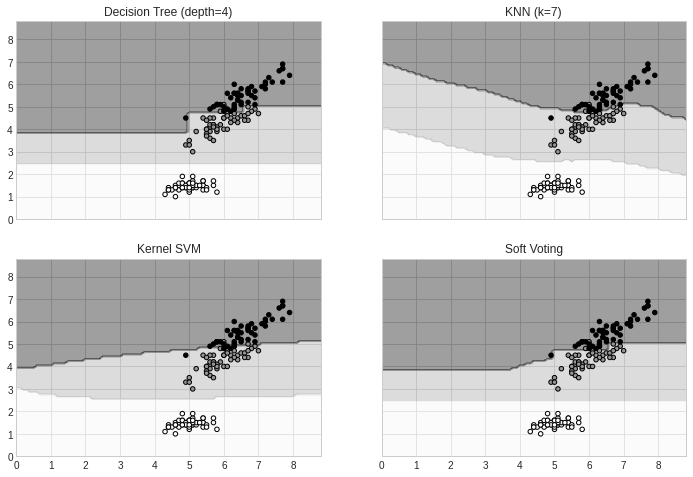

In [ ]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           "Kernel SVM", 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [93]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

In [94]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print("R2: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.15) [GradientBoostingRegressor]
R2: 0.62 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.19) [VotingRegressor]


### 회귀식 시각화

In [ ]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [ ]:
x_min, x_max = X.min()-1, X.max() + 1
xx= np.arange(x_min-1, x_max+1, .1)

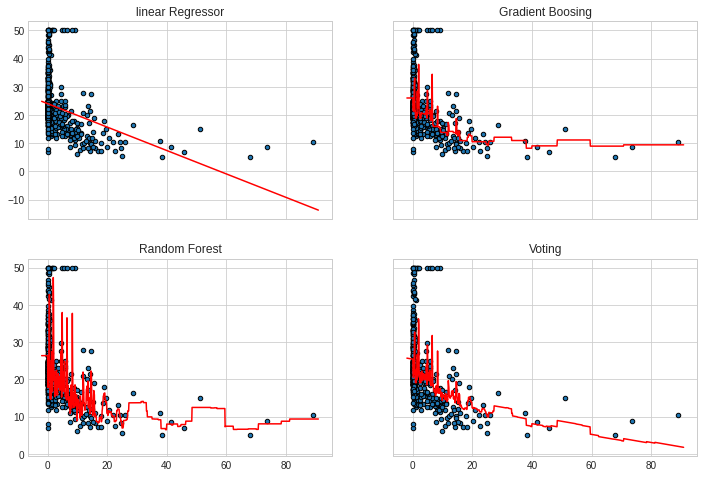

In [ ]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['linear Regressor', 'Gradient Boosing', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [95]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [96]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [97]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [98]:
cross_val = cross_validate(
    estimator = reg,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15625829696655275 (+/- 0.019158032450067957)
avg score time: 0.0029186248779296876 (+/- 9.226381307210646e-05)
avg test score: 0.3186366839792472 (+/- 0.3417646579181006)


#### 회귀식 시각화

In [ ]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [ ]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor())

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

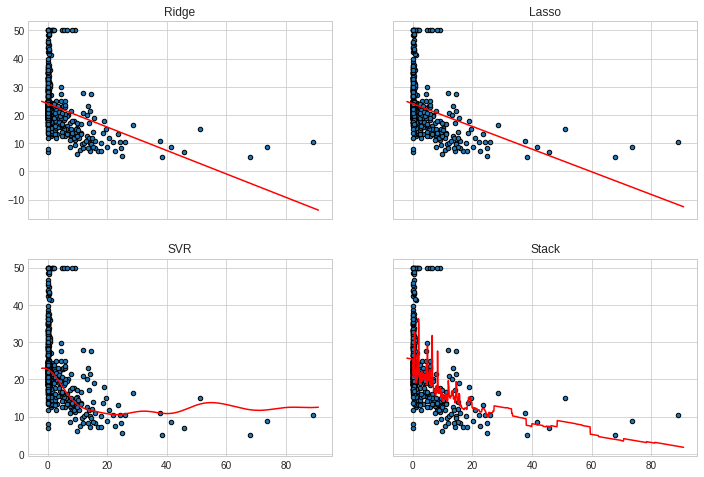

In [ ]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [100]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('navie', GaussianNB())]

In [101]:
clf = StackingClassifier(
        estimators = estimators,
        final_estimator = RandomForestClassifier()
    )

In [102]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3327683448791504 (+/- 0.036667682853539885)
avg score time: 0.010034704208374023 (+/- 0.0011252577661752924)
avg test score: 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [ ]:
X = iris.data[:, [0, 2]]
y = iris.target

In [ ]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [ ]:
x_min, x_max = X.min()-1, X.max() + 1
y_min, y_max = X.min()-1, X.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

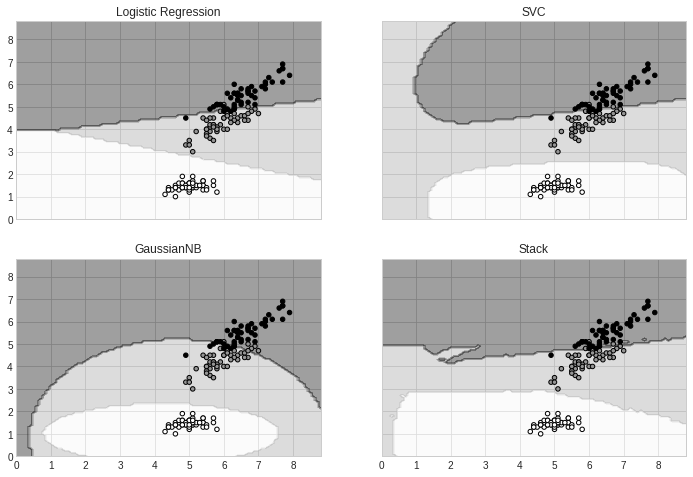

In [ ]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', "GaussianNB", 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()